<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

![Used%20Cars.jpeg](attachment:Used%20Cars.jpeg)

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
  8.1[**Model Analysis**](#Section81)<br>
  8.2[**Year Analysis**](#Section82)<br>
  8.3[**Body Analysis**](#Section83)<br>
  8.4[**Regstration Analysis**](#Section84)<br>
  8.5[**Mileage Analysis**](#Section85)<br>
  8.6[**Price Analysis**](#Section86)<br>
  8.7[**Model Analysis**](#Section87)<br>
  8.8[**Drive Analysis**](#Section88)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>
10. [**Building model**](#Section10)</br>
  10.1 [**Scaling and Encoding**](#Section101)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- Used car sales in India have witnessed tremendous growth in the last few years.  

- As a study by Statista says, the used car market size in India was more than 4.4 million units in FY2020, which was more than the size of the new car market during that period.

- The used car sales in India have grown nearly 50% YoY in December 2020, as compared to the same month in 2019.

- In FY2021 though, the pace of business for both the new and used car sales slowed down and only 3.9 million units of used cars were sold in the last fiscal. 

- However, the used car sales again saw an uptick in sales as the countrywide lockdown was withdrawn phase by phase and people were showing more interest in personal mobility.

- The growth in this segment is projected to grow even more in the coming years.

---
<a name = Section2></a>
# **2. Problem Statement**
---
The notebooks explores the basic use of __Pandas__ and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
Exploratory Data Analysis 
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :

- Finding patterns in Data


- Determining relationships in Data


- Checking of assumptions


- Preliminary selection of appropriate models


- Detection of mistakes 

Our main objective for data analysis is to get the solution for below mentioned Business question


- Why sale is getting reduced?



- How can the sales be improved 

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---


### **Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**


In [3]:

import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import pandas_profiling                        # Import Pandas Profiling (To generate Univariate Analysis)

import numpy as np                                                  # Importing package numpys (For Numerical Python)

import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

           
from sklearn.model_selection import train_test_split,GridSearchCV    # Importing library for scientific calculations
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import pickle


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- Here are the Features of the Dataset with their respective description

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [4]:
car_sales_data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', car_sales_data.shape)
car_sales_data.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [5]:
car_sales_data.describe(include="all").round(2)

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.00,9576,9576.00,9142.00,9576,9576,9576.00,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.32,NaN,138.86,2.65,NaN,NaN,2006.61,NaN,NaN
std,NaN,24106.52,NaN,98.63,5.93,NaN,NaN,7.07,NaN,NaN
min,NaN,0.00,NaN,0.00,0.10,NaN,NaN,1953.00,NaN,NaN
25%,NaN,4999.00,NaN,70.00,1.60,NaN,NaN,2004.00,NaN,NaN
50%,NaN,9200.00,NaN,128.00,2.00,NaN,NaN,2008.00,NaN,NaN
75%,NaN,16700.00,NaN,194.00,2.50,NaN,NaN,2012.00,NaN,NaN


**Observation:**

- There are some missing values on **engType** and **drive** as the count of those fields are lesser than other fields which has 9576

- There are 
  - 87 Unique car brands available with **Volkswagen** as the top seller
  - 6 Unique Body type and people preferred **Sedan**
  - 4 Unique engType and **Petrol Cars** are the most selling Used cars
  - min value of price is 0 which is not possible
  - min value of mileage is 0 which is not possible

### **Data Information**

In [6]:
car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


**Catagorical Fields:** car,body,engType,registration,model,drive<br><br>
**Numerical Fields:** price,mileage,engV<br><br>
**Note**:year can be change to datetime format

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- need to perform pandas profiling and get some observations out of it...

In [7]:
profile=pandas_profiling.ProfileReport(car_sales_data)
profile.to_file(output_file="Used Cars_profiling_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---


In [8]:
car_sales_data.duplicated().sum()

113

**Observations:** 113 dupliactes rows

### Handling duplicate data

In [9]:
car_sales_data.drop_duplicates(inplace= True)
car_sales_data.shape

(9463, 10)

### Handling Missing Values

In [10]:
car_sales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

**Observation:** 434 Missing values in engV and 510 Missing values in drive

#### Handling Missing value on engV

**engV:** Replacing missing values now for engV column based on car & model group product and median value of engV based on this group.

In [11]:
def get_median_engV(car_data):
    brand = car_data.name[0]
    if car_data.count() > 0:
        return car_data.median() # Return median for a brand/model if the median exists.
    elif car_sales_data.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = car_sales_data.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return car_sales_data['engV'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = car_sales_data.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_medn'}, inplace=True)
engV_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car        908 non-null    object 
 1   model      908 non-null    object 
 2   engV_medn  908 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.4+ KB


In [12]:
def fill_with_median(car_data):
    if pd.isnull(car_data['engV']):
        return engV_median[(engV_median['car'] == car_data['car']) & (engV_median['model'] == car_data['model'])]['engV_medn'].values[0]
    else:
        return car_data['engV']
    
car_sales_data['engV'] = car_sales_data.apply(fill_with_median, axis=1)
car_sales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

#### Handling drive missing value

**drive**:Replacing missing values now for drive column based on car & model group product and mode value of drive based on this group.

In [13]:
def get_drive_mode(car_data):
    brand = car_data.name[0]
    if car_data.count() > 0:
        return car_data.mode()        # Return mode for a brand/model if the mode exists.
    elif car_sales_data.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = car_sales_data.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode      # Return mode of brand if particular brand/model combo has no mode,
    else:                      # but brand itself has a mode for the 'drive' feature. 
        return car_sales_data['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = car_sales_data.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   car         919 non-null    object
 1   model       919 non-null    object
 2   drive_mode  919 non-null    object
dtypes: object(3)
memory usage: 21.7+ KB


In [14]:
def fill_with_mode(car_data):
    if pd.isnull(car_data['drive']):
        return drive_modes[(drive_modes['car'] == car_data['car']) & (drive_modes['model'] == car_data['model'])]['drive_mode'].values[0]
    else:
        return car_data['drive']
    
car_sales_data['drive'] = car_sales_data.apply(fill_with_mode, axis=1)
car_sales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [15]:
car_sales_data[car_sales_data["price"]==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
92,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front


#### Handling invalid values on Price field

- Replacing invalid values(price field has 0 in 267 records which is invalid) now for price column based on car & model group product and median value of price based on this group.

In [16]:
def get_median_price(car_data):
    brand = car_data.name[0]
    if car_data.count() > 0:
        if car_data.median()>0: # if median is greater than 0
            return car_data.median()# Return median for a brand/model if the median exists.
        else:
            return car_sales_data['price'].median() # return toatl price median if brand/model is equal 0
    elif car_sales_data.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = car_sales_data.groupby(['car'])['price'].apply(lambda x: x.median())[brand] 
        if brand_median>0:
            return brand_median # Return median of brand if particular brand/model combo has no median,
        else:
            return car_sales_data['price'].median() # return median of total price column if brand_median <0
    else:                 
        return car_sales_data['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = car_sales_data.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_median'}, inplace=True)
price_median[price_median["price_median"]==0]

,car,model,price_median


In [17]:
def fill_with_median(car_data):
    if car_data["price"]==0:
        return price_median[(price_median["car"]==car_data["car"])&(price_median["model"]==car_data["model"])].price_median.values[0]
    else:
        return car_data["price"]
    
car_sales_data["price"]=car_sales_data.apply(fill_with_median,axis=1)
car_sales_data.describe()

,price,mileage,engV,year
count,9463.000000,9463.000000,9463.000000,9463.000000
mean,15950.567493,139.924654,2.622469,2006.525837
std,23753.146761,98.466036,5.999659,7.062584
min,259.350000,0.000000,0.100000,1953.000000
25%,5494.500000,70.000000,1.600000,2004.000000
50%,9500.000000,129.000000,2.000000,2008.000000
75%,16999.000000,195.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


#### Handling mileage invalid values

- Replacing invalid values(mileage field has 0 in 348 records which is invalid) now for mileage column based on car & model group product and median value of price based on this group.

In [18]:
def get_median_mileage(car_data):
    brand = car_data.name[0]
    if car_data.count() > 0:
        if car_data.median()>0: # if median is greater than 0
            return car_data.median()# Return median for a brand/model if the median exists.
        else:
            return car_sales_data['mileage'].median() # return toatl price median if brand/model is equal 0
    elif car_sales_data.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = car_sales_data.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand] 
        if brand_median>0:
            return brand_median # Return median of brand if particular brand/model combo has no median,
        else:
            return car_sales_data['mileage'].median() # return median of total price column if brand_median <0
    else:                 
        return car_sales_data['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
mileage_median = car_sales_data.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_median'}, inplace=True)
mileage_median[mileage_median["mileage_median"]==0]

,car,model,mileage_median


In [19]:
def fill_with_median(car_data):
    if car_data["mileage"]==0:
        return mileage_median[(mileage_median["car"]==car_data["car"])&(mileage_median["model"]==car_data["model"])].mileage_median.values[0]
    else:
        return car_data["mileage"]
    
car_sales_data["mileage"]=car_sales_data.apply(fill_with_median,axis=1)


In [20]:
car_sales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [21]:
profile =pandas_profiling.ProfileReport(car_sales_data,title="Used Cars Profiling after Data Preprocessing")
profile.to_file(output_file="Used Cars_profiling_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---


<a name = Section81></a>
### **8.1 Brand Analysis**

In [22]:
print("Number of unique car brands:{}".format(car_sales_data["car"].nunique()))

Number of unique car brands:87


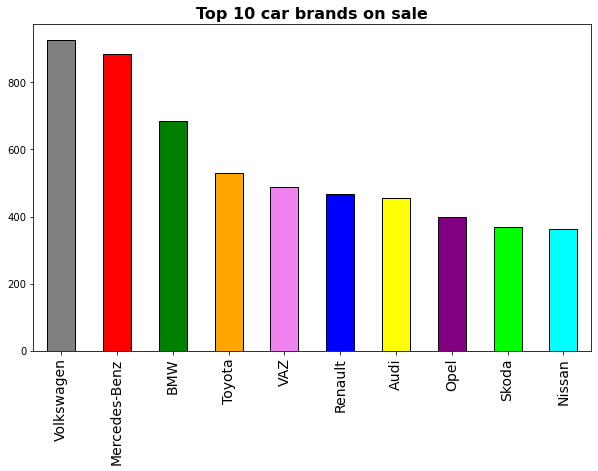

In [23]:
car_sales_data["car"].value_counts().head(10).plot.bar(figsize=(10,6),color=('gray','red','green','orange','violet','blue','yellow','purple','lime','aqua'),edgecolor='black')
plt.title("Top 10 car brands on sale",fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.show()

**Observation: Volkswagen** and **Mercedes-Benz** are the most selling user car brand

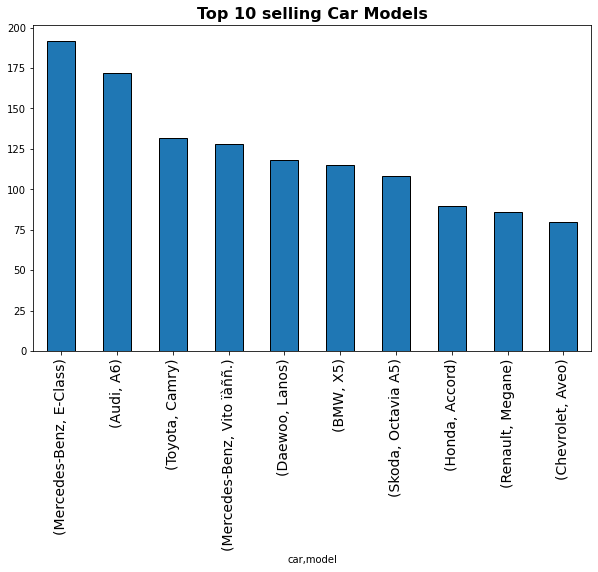

In [24]:
car_sales_data.groupby(["car"])["model"].value_counts().sort_values(ascending=False).head(10).plot(figsize=(10,6),kind='bar',edgecolor='black')
plt.title("Top 10 selling Car Models",fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.show()

**Observation: Mercedes-Benz E-Class** and **Audi A6** are the most selling car models

<a name = Section82></a>
### 8.2 Year Analysis

### Used cars sales in year over year 

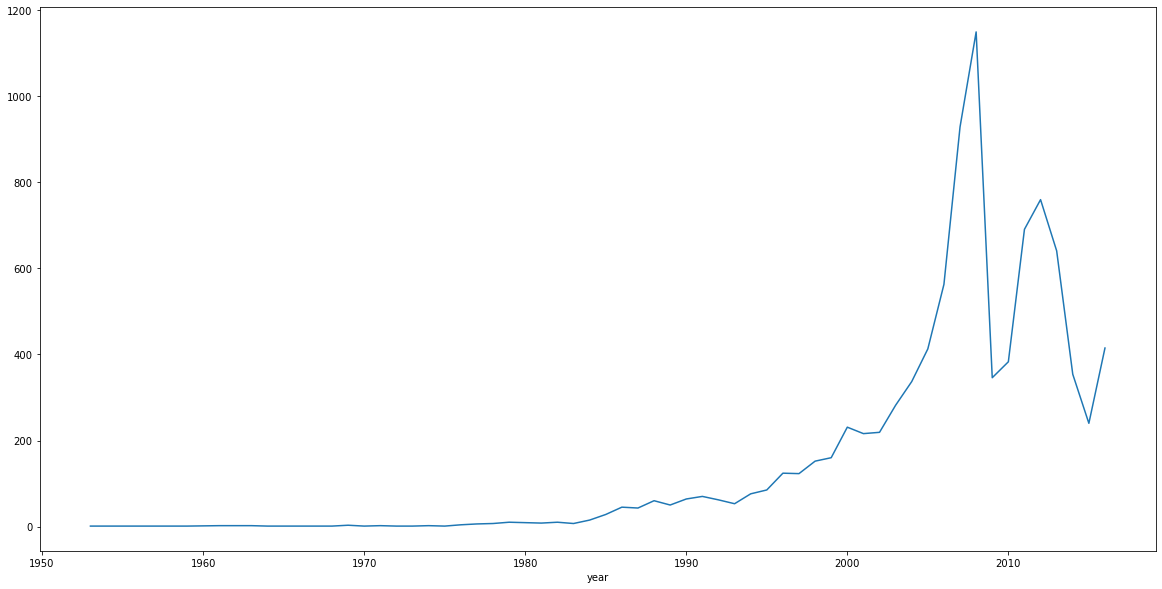

In [25]:
car_sales_data.groupby("year")["car"].count().plot(figsize=(20,10))
plt.show()

### Car Sales after Year 2000

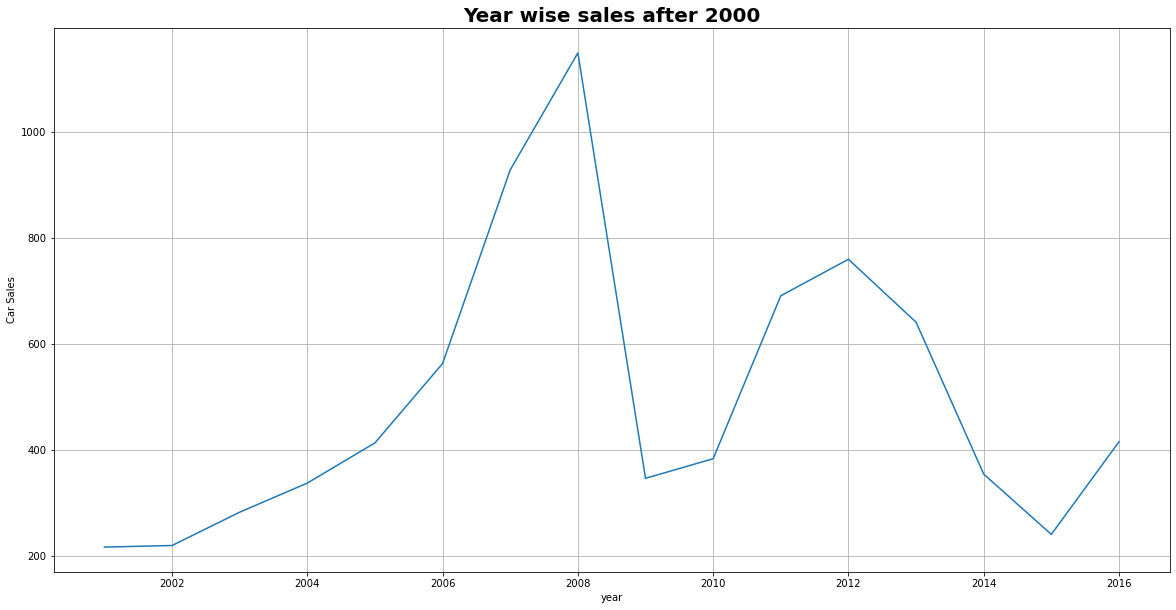

In [26]:
car_sales_data[(car_sales_data["year"]>2000)].groupby("year")["car"].count().plot(figsize=(20,10))
plt.grid(True)
plt.ylabel("Car Sales")
plt.title("Year wise sales after 2000",fontsize=20,fontweight='bold')
plt.show()

**Observation:** Sales got dropped after 2008 and picked up a little in 2010 then there is a drop in 2012

In [27]:
def decade(year):
    decade = ''
    if (year > 1950) & (year <= 1960):
        decade = '1951-60'
    elif (year> 1960) & (year <= 1970):
        decade = '1961-70'
    elif (year > 1970) & (year <= 1980):
        decade = '1971-80'
    elif (year> 1980) & (year<= 1990):
        decade = '1981-90'
    elif (year> 1990) & (year<= 2000):
        decade = '1991-2000'
    elif (year > 2000) & (year<= 2010):
        decade = '2001-10'
    else:
        decade = '2011-20'
    return decade

Text(0.5, 1.0, 'Car Sales in each decade')

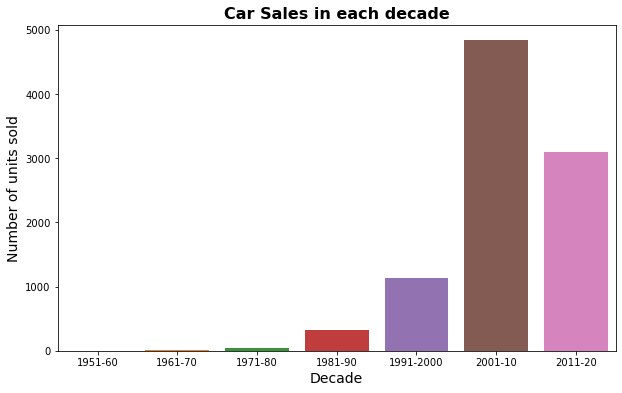

In [28]:
car_sales_data["decade"]=car_sales_data.year.apply(decade)
plt.figure(figsize=(10,6))
sns.countplot(x=car_sales_data["decade"],order=['1951-60','1961-70','1971-80','1981-90','1991-2000','2001-10','2011-20'])
plt.xlabel('Decade',fontsize=14)
plt.ylabel('Number of units sold',fontsize=14)
plt.title("Car Sales in each decade",fontsize=16,fontweight='bold')

**Observation:** Most car sold on decade **2001-10**

### Year Wise Revenue from 2000

<AxesSubplot:xlabel='year'>

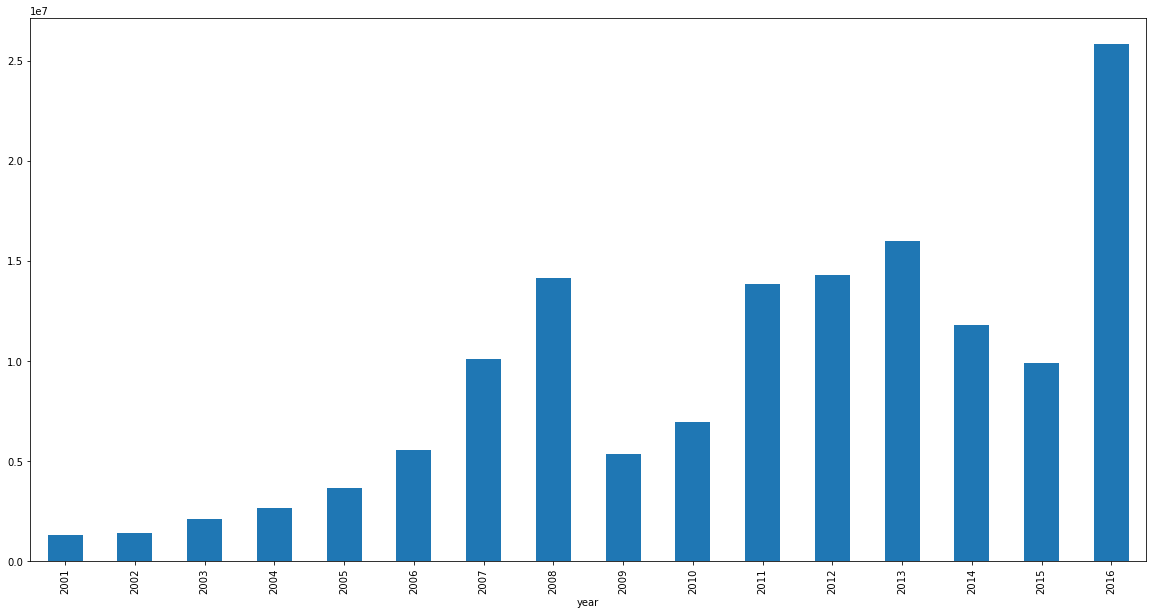

In [29]:
car_sales_data[car_sales_data['year']>2000].groupby("year")["price"].sum().round().plot(kind='bar',figsize=(20,10))

**Observation:** The highest revenue was earned in **2016** through **25,850,559** dollars worth of sales while there are was a drop in **2009** with the total revenue being only **5,333,548** dollars where the drop from **2008** was **14,149,952** dollars.

<a name = Section83></a>
### 8.3 Body Analysis

Text(0.5, 1.0, 'Most preferred body type')

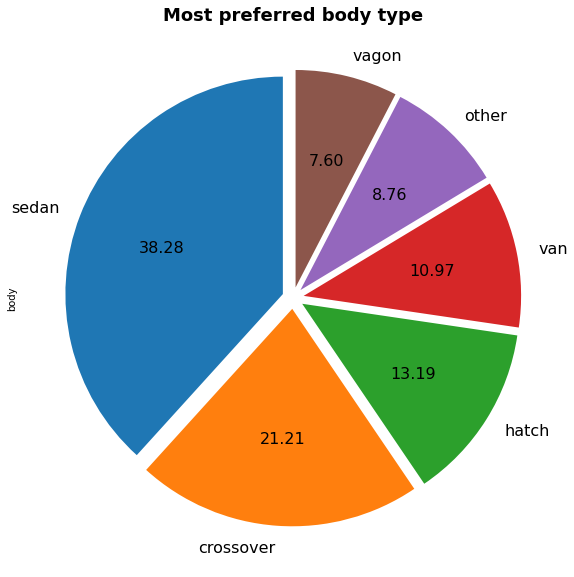

In [30]:
# sns.countplot(x='body',data=car_sales_data,orient='h')
car_sales_data.body.value_counts().plot(kind='pie',autopct='%.2f',figsize=(20,10),fontsize=16,explode=[0.05]*6,startangle=90)
plt.title("Most preferred body type",fontdict={'fontsize':18,'fontweight':'bold'})

**Observation: Seden** is the most preferred body type

#### Body Type vs Price of Top five company

Text(0, 0.5, 'No. of Car sales')

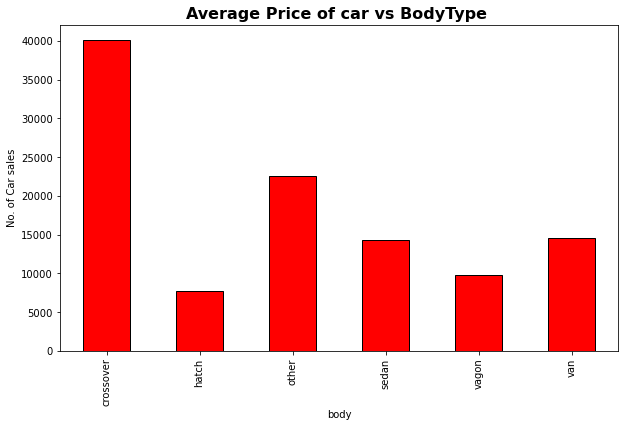

In [31]:
top_5_company=[*car_sales_data["car"].value_counts().sort_values(ascending=False).head(5).keys()]
car_sales_data[car_sales_data["car"].isin(top_5_company)].groupby("body")['price'].mean().plot(kind='bar',figsize=(10,6),edgecolor='black',color='red')
plt.title("Average Price of car vs BodyType ",fontsize=16,fontweight='bold')
plt.ylabel("No. of Car sales")

**Observation: Crossover** is the most expensive body type car

#### Body Type vs Engine Type

In [32]:
body_engine_tab = pd.crosstab(car_sales_data["body"], car_sales_data["engType"], rownames=['body'], colnames = ['engType'])
body_engine_tab

engType,Diesel,Gas,Other,Petrol
body,,,,
crossover,726,418,52,811
hatch,129,199,124,796
other,293,84,55,397
sedan,528,858,177,2059
vagon,388,95,27,209
van,886,56,27,69


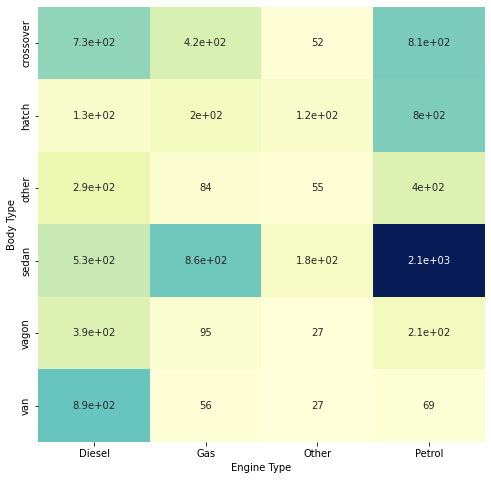

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(body_engine_tab,
            cmap="YlGnBu", annot=True, cbar=False)
plt.xlabel('Engine Type');
plt.ylabel('Body Type');

**Observation:** Most **Gas** based cars are **Sedans** while maximum number of **Sedans** run on Petrol. **Vans** almost exclusively run on **Diesel**.

#### Hatchback Sales

In [34]:
car_sales_data[car_sales_data['body'] == 'hatch']['car'].value_counts().head(15)

Ford          116
Volkswagen    112
VAZ           111
Skoda         105
Nissan         92
Toyota         59
Hyundai        59
Opel           56
Peugeot        50
Daewoo         45
Chevrolet      41
Renault        41
ZAZ            40
Kia            33
Citroen        33
Name: car, dtype: int64

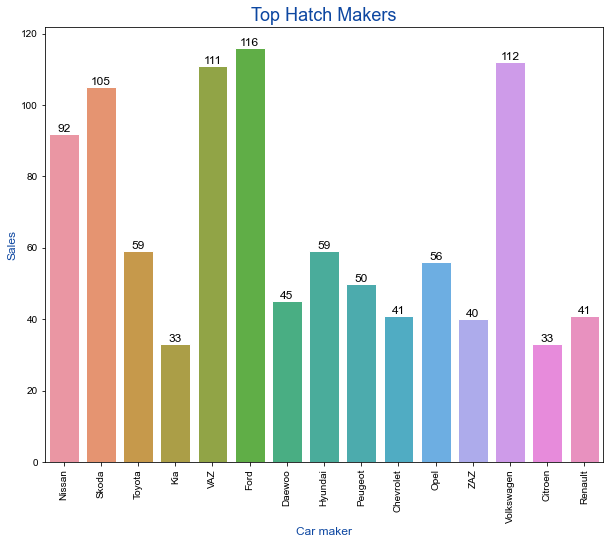

In [35]:
#list of top 15 hatch makers based on sales 
top_selling_cars = car_sales_data[car_sales_data['body'] == 'hatch']['car'].value_counts().head(15).keys().tolist()

temp_df = car_sales_data[(car_sales_data['car'].isin(top_selling_cars)) & (car_sales_data['body'] == 'hatch')]

fig, ax = plt.subplots(figsize=(10,8))
sns.set(style="darkgrid")
plot = sns.countplot(x='car', data=temp_df)

#rotate X - axis labels
for item in plot.get_xticklabels():
    item.set_rotation(90)
    
#set column value on top of the bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
ax.set_xlabel('Car maker', size=12, color="#0D47A1")
ax.set_ylabel('Sales', size=12, color="#0D47A1")
ax.set_title('Top Hatch Makers', size=18, color="#0D47A1")

plt.show()


**Observation: Ford** has sold the maximum number of hatchbacks with 116 units followed by Volkswagen at 112 each.

#### Van Sales

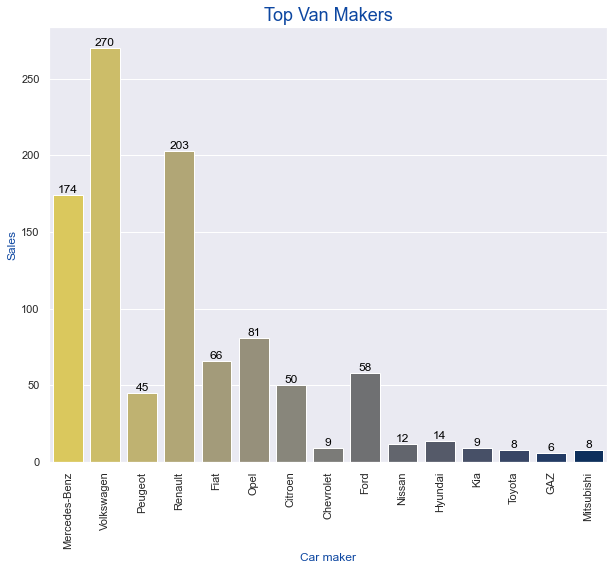

In [36]:
#list of top 15 van makers based on sales 
top_selling_cars = car_sales_data[car_sales_data['body'] == 'van']['car'].value_counts().head(15).keys().tolist()

temp_df = car_sales_data[(car_sales_data['car'].isin(top_selling_cars)) & (car_sales_data['body'] == 'van')]

fig, ax = plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
plot = sns.countplot(x='car', data=temp_df, palette="cividis_r")

#rotate X - axis labels
for item in plot.get_xticklabels():
    item.set_rotation(90)
    
#set column value on top of the bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
ax.set_xlabel('Car maker', size=12, color="#0D47A1")
ax.set_ylabel('Sales', size=12, color="#0D47A1")
ax.set_title('Top Van Makers', size=18, color="#0D47A1")

plt.show()

**Observation:Volkswagen** has sold the maximum number of Vans with 270 units followed by **Renault** at 203.

<a name = Section84></a>
### 8.4 Registration Analysis

/Users/gayathriselvaganapathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


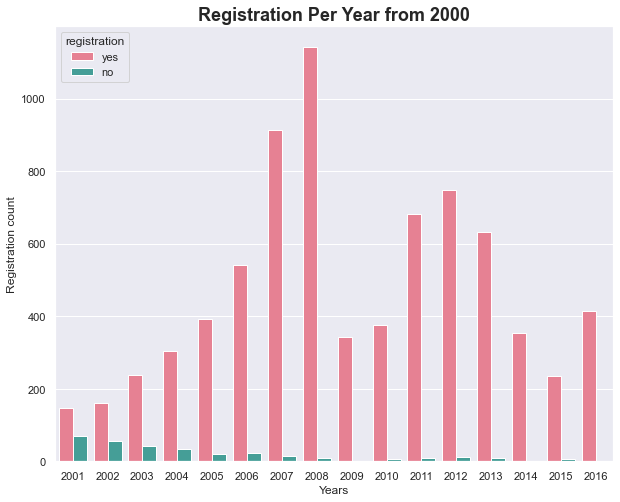

In [37]:
plt.figure(figsize=(10,8))        
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("husl",2))
sns.countplot("year", hue='registration', data=car_sales_data[car_sales_data["year"]>2000])
plt.ylabel("Registration count")
plt.xlabel("Years")
plt.title("Registration Per Year from 2000",fontsize=18,fontweight='bold')
plt.show()

<a name = Section85></a>
### 8.5 Mileage Analysis

#### Analysis among top 5 companies

In [38]:
top_5_company=[*car_sales_data["car"].value_counts().sort_values(ascending=False).head(5).keys()]

Text(0.5, 1.0, 'Engine Type Vs. Mileage')

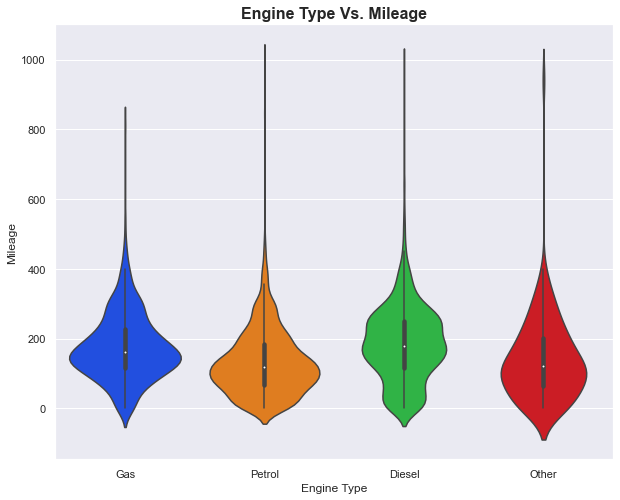

In [39]:
#Find the mileage offered amongst top selling cars
df = car_sales_data[car_sales_data['car'].isin(top_5_company)]

plt.figure(figsize=(10,8))
#Compare Fuel type with the mileage offered
ax = sns.violinplot(x="engType", y="mileage", palette="bright", data=df)
plt.xlabel("Engine Type")
plt.ylabel("Mileage")
plt.title("Engine Type Vs. Mileage", fontsize=16, fontweight = "bold")

#### Visualization of Engine Type vs Mileage for each company in top 5

Text(0, 0.5, 'Mileage')

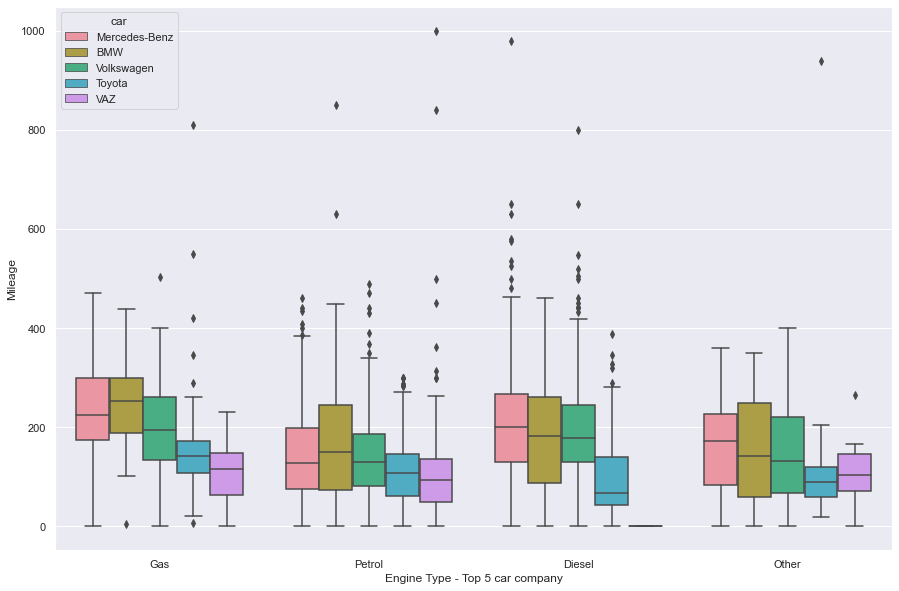

In [40]:
plt.figure(figsize=(15,10))

sns.boxplot(x="engType", y="mileage", hue='car', data=df)
plt.xlabel("Engine Type - Top 5 car company")
plt.ylabel("Mileage")

#### Visualization of company vs mileage with respect to each engType

Text(0, 0.5, 'Mileage')

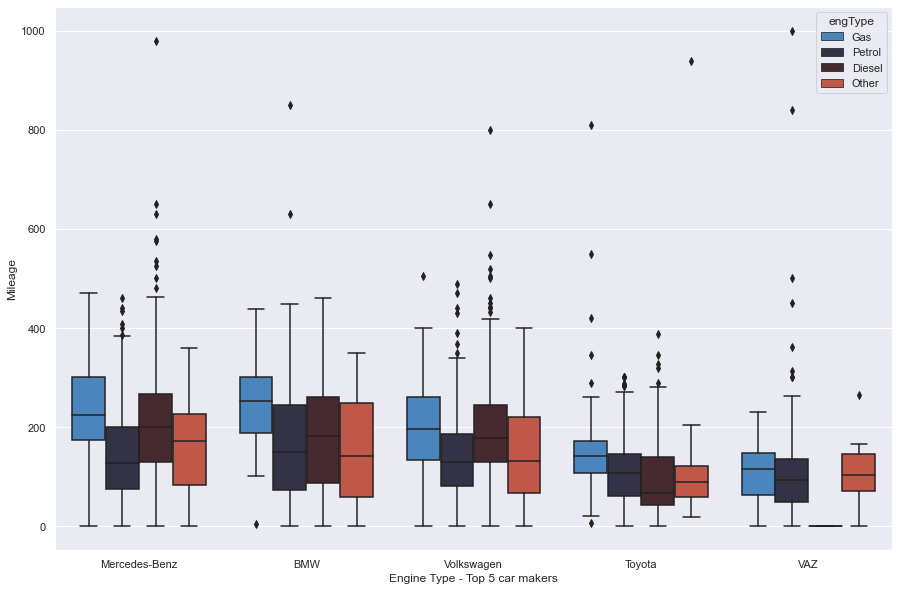

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(x="car", y="mileage", hue='engType', data=df ,palette='icefire')

plt.xlabel("Engine Type - Top 5 car makers")
plt.ylabel("Mileage")

Text(0.5, 1.0, 'Engine Type vs Mileage')

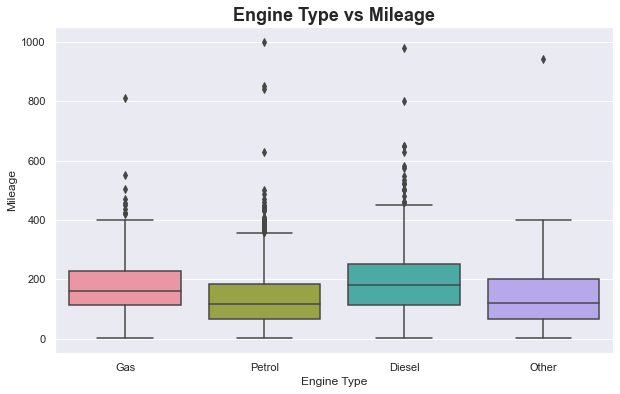

In [42]:
plt.figure(figsize=(10,6))

sns.set_style("darkgrid")
sns.boxplot(x="engType", y="mileage", data=df)

plt.xlabel("Engine Type")
plt.ylabel("Mileage")
plt.title("Engine Type vs Mileage",fontsize=18,fontweight='bold')

**Observation:Diesel** cars provide the better mileage compared to other engine types.

<a name = Section86></a>
### 8.6 Price Based Analysis

#### Price segments based on Engine type

/Users/gayathriselvaganapathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gayathriselvaganapathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gayathriselvaganapathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gayathriselvaganapathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<AxesSubplot:xlabel='engType', ylabel='price'>

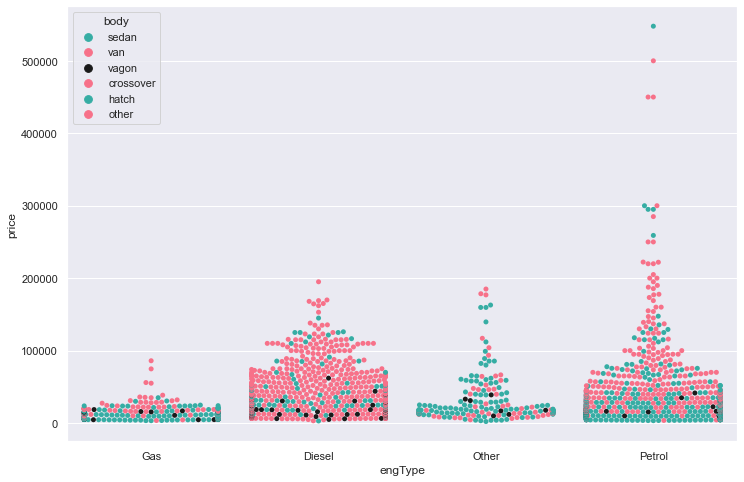

In [43]:
plt.figure(figsize=(12,8))

#Swarm Plot based on Engine Type
sns.swarmplot(x="engType", y="price", hue='body', data=car_sales_data[car_sales_data['year'] > 2010], palette ={"crossover":"C0","sedan":"C1","van":"C2", "vagon":"k","hatch":"C5", "other":"C6"})

#### Minimum, Maximum and Average prices across segments

In [44]:
#group based on calendar year and body type
year_body_grp = car_sales_data[car_sales_data['year'] >= 2006].groupby(['year', 'body'])

year_body_grp.size()

year  body     
2006  crossover    118
      hatch         77
      other         45
      sedan        215
      vagon         48
                  ... 
2016  hatch         27
      other         39
      sedan         85
      vagon         11
      van           17
Length: 66, dtype: int64

In [45]:
price_prof_cols = ['year','body','average','min', 'max']
price_prof_df = pd.DataFrame(columns=price_prof_cols)         # columns is used to set the column name

#get the min, max and average prices for each body type for every year and create a temporary data frame
for name, group in year_body_grp:
    param_list = [(name[0], name[1], group['price'].mean(), group['price'].min(), group['price'].max())]
    price_prof_df = price_prof_df.append(pd.DataFrame(param_list, columns=price_prof_cols))
price_prof_df.reset_index(inplace=True)
price_prof_df

,index,year,body,average,min,max
0,0,2006,crossover,14393.084746,4000.00,40000.0
1,0,2006,hatch,6015.531818,2100.00,10900.0
2,0,2006,other,14206.311111,3500.00,130000.0
3,0,2006,sedan,8941.183721,1600.00,55000.0
4,0,2006,vagon,7580.687500,2200.00,17500.0
...,...,...,...,...,...,...
61,0,2016,hatch,20614.544469,10500.00,52222.0
62,0,2016,other,76071.877964,10999.50,250000.0
63,0,2016,sedan,41867.006025,2100.00,547800.0
64,0,2016,vagon,20118.780250,9151.35,43900.0


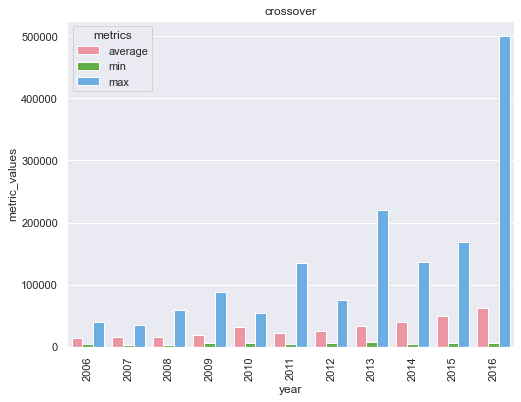

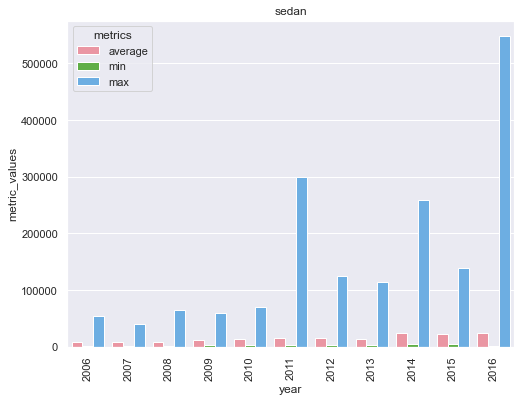

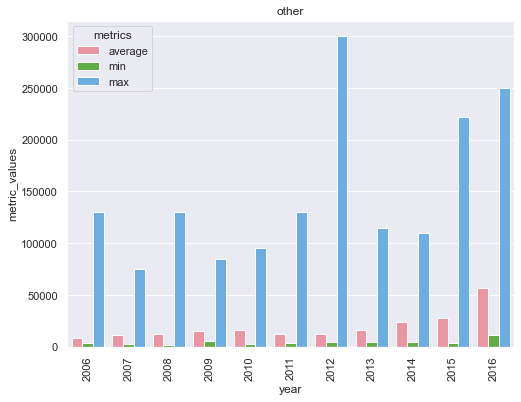

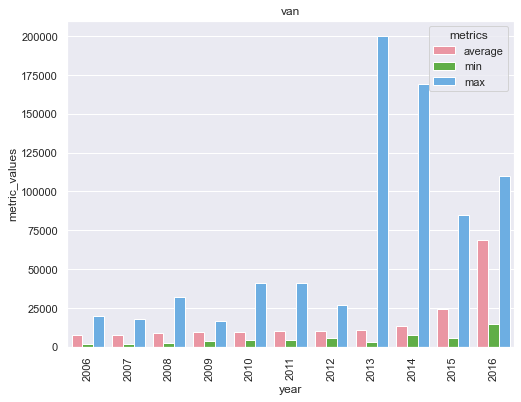

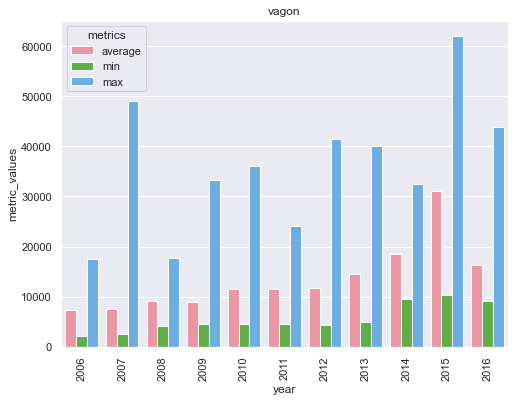

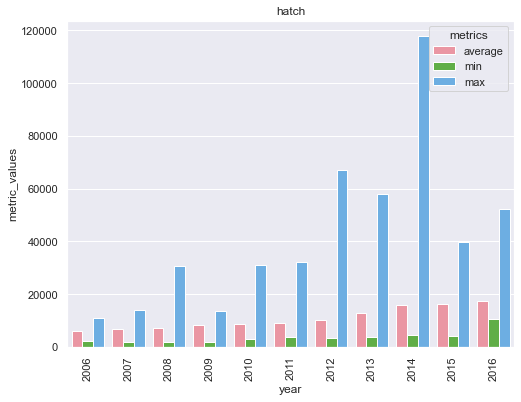

In [46]:
#create a separate plot for each body type
for btype in car_sales_data.body.unique().tolist():
    price_prof_df = pd.DataFrame(columns=price_prof_cols) 
    year_body_grp = car_sales_data[(car_sales_data['year'] >= 2006) & (car_sales_data['body'] == btype)].groupby(['year', 'body'])

    for group_name, df_group in year_body_grp:  
        param_list = [(group_name[0], group_name[1], df_group['price'].median(), df_group['price'].min(), df_group['price'].max())]
        price_prof_df = price_prof_df.append(pd.DataFrame(param_list, columns=price_prof_cols))

    price_prof_df.reset_index(inplace=True)
    
    melt_params = price_prof_df.drop('index', axis=1).drop('body', axis=1).melt('year', var_name='metrics', value_name='metric_values')
    plt.figure(figsize=(8,6))
    ax=sns.barplot(x='year', y='metric_values', hue='metrics', data=melt_params)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.title(btype)
    plt.show()

With the exception of **Vagon**, the average prices of other segments keep incresing every year.

### Analysis based on price

Segregate the proces into 4 groups:
- Less than 10000
- Between 10000 and 50000
- Between 50000 and 100000
- Above 100000

Determine the volume of sales for each car maker in each of these price groups

#### Expensive cars- above 100000

Text(0.5, 1.0, 'Market share in Expensive Cars')

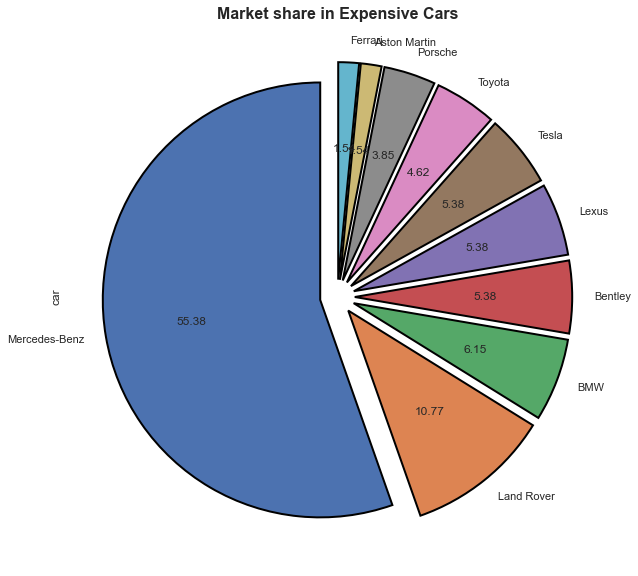

In [47]:
plt.figure(figsize=(10,10))
sns.set(color_codes=False)   
explode=[0.08]*10
car_sales_data[(car_sales_data['price'] >= 100000)].groupby('car')['car'].count().sort_values(ascending=False).head(10).plot.pie(autopct="%.2f",explode=explode, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True},startangle=90)
plt.title('Market share in Expensive Cars',fontdict={'fontsize':16,'fontweight':'bold'})


**Observation: Mercedes-Benz** cars are most expensive used cars with 55.38%

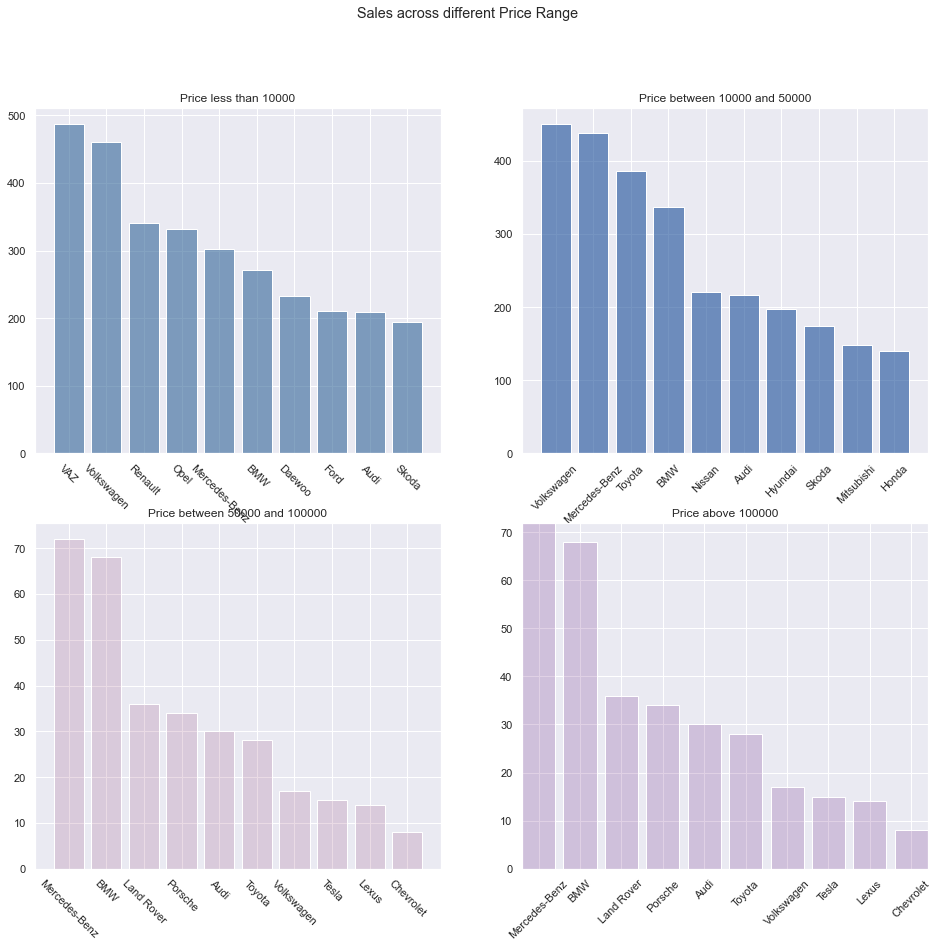

In [48]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,14))

#Create sub plots for every price range

ax1.set_title('Price less than 10000')
cars = car_sales_data[(car_sales_data['price'] < 10000)]['car'].value_counts().sort_values(ascending=False).head(10).reset_index()
ax1.bar(cars["index"], cars["car"], color=(0.2, 0.4, 0.6, 0.6))
ax1.tick_params(axis ='x', rotation =-45)

ax2.set_title('Price between 10000 and 50000')
cars = car_sales_data[(car_sales_data['price'] >= 10000) & (car_sales_data['price'] < 50000)]['car'].value_counts().sort_values(ascending=False).head(10).reset_index()
ax2.bar(cars["index"], cars["car"], color=(0.1, 0.3, 0.6, 0.6))
ax2.tick_params(axis ='x', rotation =45)

ax3.set_title('Price between 50000 and 100000')
cars = car_sales_data[(car_sales_data['price'] >= 50000) & (car_sales_data['price'] < 100000)]['car'].value_counts().sort_values(ascending=False).head(10).reset_index()
ax3.bar(cars["index"], cars["car"], color=(0.6, 0.3, 0.5, 0.2))
ax3.tick_params(axis ='x', rotation =-45)

ax4.set_title('Price above 100000')
ls1 = car_sales_data[(car_sales_data['price'] >= 100000)]['car'].value_counts().sort_values(ascending=False).head(10).reset_index()
ax4.bar(cars["index"], cars["car"], color=(0.4, 0.1, 0.5, 0.2))
ax4.tick_params(axis ='x', rotation =45)

plt.margins(0,0)
fig.suptitle('Sales across different Price Range')
plt.show()

**Observations: Mercedes-Benz** has virtual monopoly in the expensive car segment. It has near top share in the next two price ranges. In the lowest price bracket, **VAZ** and **Volkswagen** sell the most number of cars.

#### Numer of cars sold in a price range

In [49]:
def price_range(price):
    price_range=''
    if price<10000:
        price_range='Less than 10000'
    elif (price>10000)&(price<20000):
        price_range='10000 to 20000'
    elif (price>20000)&(price<30000):
        price_range='20000 to 30000'
    elif (price>30000)&(price<40000):
        price_range='30000 to 40000'
    elif (price>40000)&(price<50000):
        price_range='40000 to 50000'
    elif (price>50000)&(price<60000):
        price_range='50000 to 60000'
    elif (price>60000)&(price<70000):
        price_range='60000 to 70000'
    elif (price>70000)&(price<80000):
        price_range='70000 to 80000'
    elif (price>80000)&(price<90000):
        price_range='80000 to 90000'
    elif (price>90000)&(price<100000):
        price_range='90000 to 100000'
    else:
        price_range="Greater than 100000"
    return price_range
car_sales_data['Price Range']=car_sales_data["price"].apply(price_range)

Text(0.5, 1.0, 'Car Sales vs Price Range')

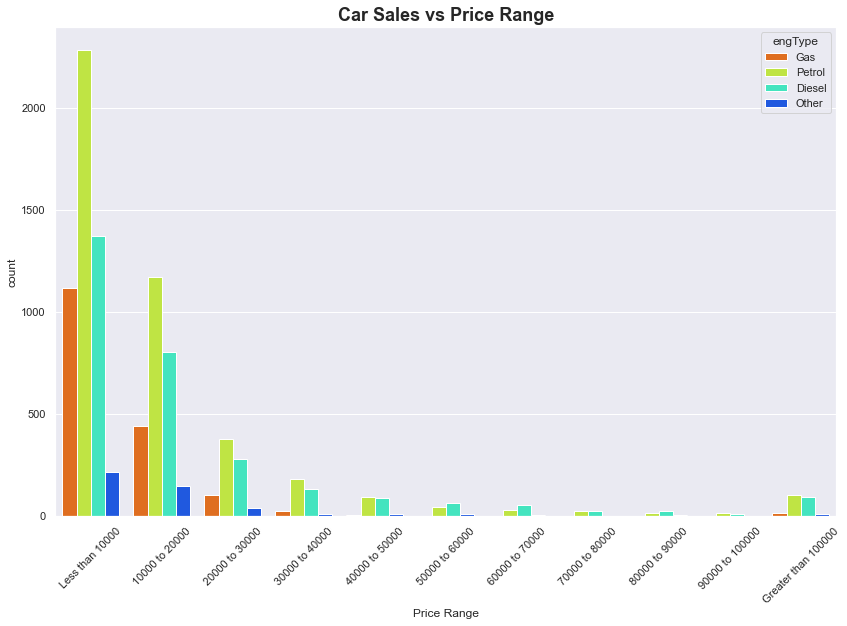

In [50]:
plt.figure(figsize=(14,9))
sns.countplot(x='Price Range',hue='engType',data=car_sales_data,palette='jet_r',order=['Less than 10000','10000 to 20000','20000 to 30000','30000 to 40000','40000 to 50000','50000 to 60000','60000 to 70000','70000 to 80000','80000 to 90000','90000 to 100000','Greater than 100000'])
plt.xticks(rotation=45)
plt.title("Car Sales vs Price Range",fontsize=18,fontweight='bold')

**Observation:** People preferred cars price **Less than 10000** specifically **Petrol** engType car followed by cars in range of **10000 to 20000**

### Overall revenues by Car Manufacturers

In [51]:
car_sales_data.groupby("car")["price"].sum().sort_values(ascending=False).round().head(30)

car
Mercedes-Benz    26950572.0
BMW              15802390.0
Volkswagen       11878879.0
Toyota           11628277.0
Audi              8304164.0
Land Rover        7628571.0
Lexus             5157065.0
Nissan            5146712.0
Hyundai           4549132.0
Porsche           4130447.0
Skoda             3992892.0
Renault           3746067.0
Mitsubishi        3678765.0
Ford              3661828.0
Bentley           2940074.0
Honda             2748673.0
Kia               2614306.0
Chevrolet         2535905.0
Opel              2523662.0
Tesla             2189200.0
Mazda             2040107.0
Infiniti          1775456.0
Peugeot           1596296.0
Subaru            1565794.0
VAZ               1410909.0
Citroen            906654.0
Daewoo             889267.0
Fiat               780533.0
SsangYong          641341.0
Jeep               641188.0
Name: price, dtype: float64

**Observation: Mercedes-Benz** has earned the most revenues overall with 26,950,572 dollars followed by **BMW** with 15,802,390 and **Volkswagen** with 11,878,879 dollars.

<a name = Section87></a>
### 8.7 Model Analysis

In [52]:
print("Number of unique car models:{}".format(car_sales_data["model"].nunique()))

Number of unique car models:888


In [53]:
top_model = (car_sales_data[car_sales_data['year'] >= 2000].groupby('body')['model']
                    .apply(lambda x: x.value_counts().head(3))
                    .reset_index())
print(top_model)

         body                 level_1  model
0   crossover                      X5    109
1   crossover      Land Cruiser Prado     71
2   crossover                  Tucson     64
3       hatch                    Leaf     53
4       hatch                   Fabia     51
5       hatch                  Fiesta     44
6       other                  Fortwo     37
7       other              Vito ïàññ.     27
8       other  T5 (Transporter) ïàññ.     17
9       sedan                   Camry    120
10      sedan                 E-Class    112
11      sedan                   Lanos    106
12      vagon                  Megane     51
13      vagon                      A6     47
14      vagon                   Fabia     21
15        van              Vito ïàññ.     85
16        van            Kangoo ãðóç.     64
17        van             Caddy ãðóç.     51


The following are the best selling models are per the body type:
- Crossover : BMW X5
- Hatch : Nissan Leaf
- Sedan : Toyota Camry
- Vagon : Renault Megane
- Van : Mercedes-Benz NACC
- Others : Smart Fortwo

<a name = Section88></a>
### 8.8Drive Analysis

Text(0.5, 1.0, 'Car sales count vs Drive type')

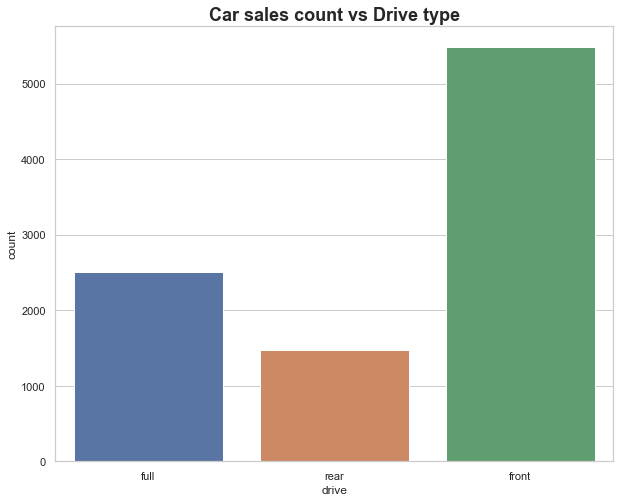

In [54]:
sns.set_style("whitegrid") 
plt.figure(figsize=(10,8)) 
sns.countplot(x='drive',data=car_sales_data) 
plt.title("Car sales count vs Drive type",fontsize=18,fontweight='bold')

**Observation:** Most of used cars sold are front wheel drive

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

 - There are 87 unique car brands available
 
 
 
 - **Volkswagen** and **Mercedes-Benz** are the most selling user car brand
 
 
    
 - **Mercedes-Benz E-Class** and **Audi A6** are the most selling car models
 
 
    
 - Sales got dropped after 2008 and picked up a little in 2010 then there is a drop in 2012
 
 
    
 - Most car sold on decade **2001-10**
 
 
    
 - **Mercedes-Benz** has earned the most revenues overall with 26,950,572 dollars followed by **BMW** with 15,802,390 and **Volkswagen** with 11,878,879 dollars.
 
 

 - The highest revenue was earned in **2016** through **25,850,559** dollars worth of sales while there are was a drop in **2009** with the total revenue being only **5,333,548** dollars where the drop from **2008** was **14,149,952** dollars.
    
    
    
 - **Seden** is the most preferred body type
    
    
    
 - **Crossover** is the most expensive body type car
    
    
    
 - Most **Gas** based cars are **Sedans** while maximum number of **Sedans** run on Petrol. **Vans** almost exclusively run on **Diesel**.
    
    
    
 - **Ford** has sold the maximum number of hatchbacks with 116 units followed by Volkswagen and VAZ at 112 each.
    
    
    
 - **Volkswagen** has sold the maximum number of Vans with 270 units followed by **Renault** at 203.
    
    
    
 - **Diesel** cars provide the better mileage compared to other engine types.
    
    
    
 - **Mercedes-Benz** cars are most expensive used cars with 55.38%
    
    
    
 - People preferred cars price **Less than 10000** specifically **Petrol** engType car followed by cars in range of **10000 to 20000**
    
    
    
 - There are **888** different models of cars available
 
 
 
 - Most of used cars sold are **front wheel drive**
 
 

<a name = Section92></a>
### **9.2 Actionable Insights**

- Price of the used cars should be less than 20000 to attract the customer



- Make sure the cars are front wheel drive as they are preferred mostly



- Less preferred cars and too old cars should be Liquidated by giving some discounts so that stock can be cleared.



- Petrol cars are preferred irrespective of the mileage


---
<a name = Section10></a>
# **10. Building Model**
---

---
<a name = Section101></a>
## **10.1. Scaling and Encoding**
---

In [55]:
x=car_sales_data.drop(["price","Price Range","decade"],axis=1)
y=car_sales_data.price

In [56]:
x.head()

,car,body,mileage,engV,engType,registration,year,model,drive
0,Ford,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,vagon,91.0,2.6,Other,yes,2013,E-Class,rear


In [57]:
for column in x.select_dtypes(include="O").columns:
    print(column,x[column].nunique(),x[column].unique(),sep="\n")

car
87
['Ford' 'Mercedes-Benz' 'Nissan' 'Honda' 'Renault' 'BMW' 'Land Rover'
 'Volkswagen' 'Audi' 'Chrysler' 'Jaguar' 'Mitsubishi' 'Kia' 'Porsche'
 'Toyota' 'Hyundai' 'Opel' 'Chevrolet' 'Skoda' 'Daewoo' 'Mazda' 'Lexus'
 'Infiniti' 'Tesla' 'Subaru' 'VAZ' 'Alfa Romeo' 'Smart' 'Peugeot' 'Suzuki'
 'Chery' 'Bentley' 'Volvo' 'SsangYong' 'Fiat' 'ZAZ' 'Citroen' 'Dodge'
 'Jeep' 'Great Wall' 'Seat' 'MINI' 'Dacia' 'Hummer' 'Geely' 'Maserati'
 'BYD' 'Cadillac' 'Acura' 'Aston Martin' 'Rover' 'GAZ' 'GMC' 'Lincoln'
 'ËUAZ' 'Moskvich-AZLK' 'FAW' 'UAZ' 'Rolls-Royce' 'TATA' 'ZX' 'Lifan'
 'Mercury' 'Groz' 'Moskvich-Izh' 'Saab' 'Lancia' 'Aro' 'Ferrari' 'Isuzu'
 'Bogdan' 'Dadi' 'Other-Retro' 'MG' 'Samand' 'JAC' 'Samsung' 'Lamborghini'
 'Daihatsu' 'Hafei' 'SMA' 'Fisker' 'Changan' 'Barkas' 'Huanghai'
 'Wartburg' 'Buick']
body
6
['crossover' 'sedan' 'other' 'van' 'vagon' 'hatch']
engType
4
['Gas' 'Petrol' 'Diesel' 'Other']
registration
2
['yes' 'no']
model
888
['Kuga' 'E-Class' 'CL 550' 'B 180' 'X-Trail' 'Acc

In [58]:
x.registration=x.registration.map({"no":0,"yes":1})

Text(0.5, 1.0, 'Mileage Distribution')

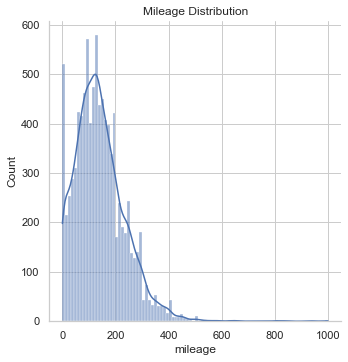

In [59]:
sns.displot(x=x.mileage,kde=True)
plt.title("Mileage Distribution")


**Observation**:Distribution is right skewed

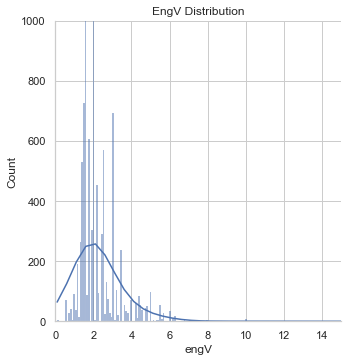

In [60]:
ax=sns.displot(x=x.engV,kde=True)
plt.xlim(0,15)
plt.ylim(0,1000)
plt.title("EngV Distribution")
plt.show()

**Observation**:Distribution is right skewed

In [61]:
cat_cols=x.select_dtypes(include="O").columns.to_list()
num_cols=['mileage', 'engV', 'year']

#### Creating column transform for scaling and encoding

In [67]:
ct=ColumnTransformer([
    ("step1",StandardScaler(),num_cols),
    ("step2",OneHotEncoder(sparse=False,handle_unknown="error",drop="first"),cat_cols)
],remainder="passthrough")
x_scaled=ct.fit_transform(x)

#### Reducing the features with PCA

--As there are 987 feature after encoding catagorical feature

In [68]:
pca=PCA(0.95)
x_reduced=pca.fit_transform(x_scaled)
print(x_reduced.shape)

(9463, 184)


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.2,random_state=12)

---
<a name = Section102></a>
## **10.2. Building model by tuning Hyperparameters**
---

In [70]:
model_params={
    "XGBRegressor":{
        "model":XGBRegressor(objective="reg:squaredlogerror"),
        "params":{
            "n_estimators":[200,250,275,300]
        }
    },
    "RandomForestRegressor":{
        "model":RandomForestRegressor(n_jobs=-1),
        "params":{
            "n_estimators":[200,250,275,300]
        }
    },
    
    "AdaboostRegressor":{
        "model":AdaBoostRegressor(),
        "params":{
            "n_estimators":[200,250,275,300],
            "learning_rate":[0.5,0.7,0.9,1.0,1.2,1.4,1.8]
    }
    },
    "KNN":{
        "model":KNeighborsRegressor(),
        "params":{
            "n_neighbors":[5,6,7,8,9,10,12],
            "weights":["uniform","distance"],
            "algorithm":['ball_tree', 'kd_tree', 'brute']
        }
    }
}

In [71]:
import time
start_time=time.time()
results={}
for model_name,params in model_params.items():
    model=params["model"]
    param=params["params"]
    clf=GridSearchCV(model,param_grid=param,n_jobs=-1,scoring="neg_root_mean_squared_error")
    clf.fit(x_train,y_train)
    results[model_name]=clf
end_time=time.time()

In [72]:
results["XGBRegressor"].best_score_

-28798.90050544148

In [73]:
results["AdaboostRegressor"].best_score_

-20467.837390587345

In [74]:
results["RandomForestRegressor"].best_score_

-11863.703284632673

In [75]:
results["KNN"].best_score_

-13139.978211220277

From this we could see that RF Regressor has least loss

In [76]:
best_model=results["RandomForestRegressor"].best_estimator_
best_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=250, n_jobs=-1)

#### Saving RandomForest Model, columnTransform and PCA

In [78]:
pickle.dump(best_model,open("RF_model.pkl","wb"))
pickle.dump(ct,open("columnTransform.pkl","wb"))
pickle.dump(pca,open("PCA.pkl","wb"))